# Regression Demo

In this demo we predict the average housing price in Boston. 

- The data: "Housing data for 506 census tracts of Boston from the 1970 census."
- Variables:
  - **crim**: per capita crime rate by town
  - **zn**: proportion of residential land zoned for lots over 25,000 sq.ft
  - **indus**: proportion of non-retail business acres per town
  - **chas**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
  - **nox**: nitric oxides concentration (parts per 10 million)
  - **rm**: average number of rooms per dwelling
  - **age**: proportion of owner-occupied units built prior to 1940
  - **dis**: weighted distances to five Boston employment centres
  - **rad**: index of accessibility to radial highways
  - **tax**: full-value property-tax rate per USD 10,000
  - **ptratio**: pupil-teacher ratio by town
  - **b**: 1000(B - 0.63)^2 where B is the proportion of blacks by town
  - **lstat**: percentage of lower status of the population
  - **medv**: median value of owner-occupied homes in USD 1000's


The outcome variable is **medv**


## Import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get Data

In [ ]:
!wget https://www.dropbox.com/s/isz2mvhqui1bw9c/boston.csv -O boston.csv

### Read and check the data

In [3]:
df_boston = pd.read_csv("boston.csv")

In [4]:
df_boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df_boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### Some visualisation

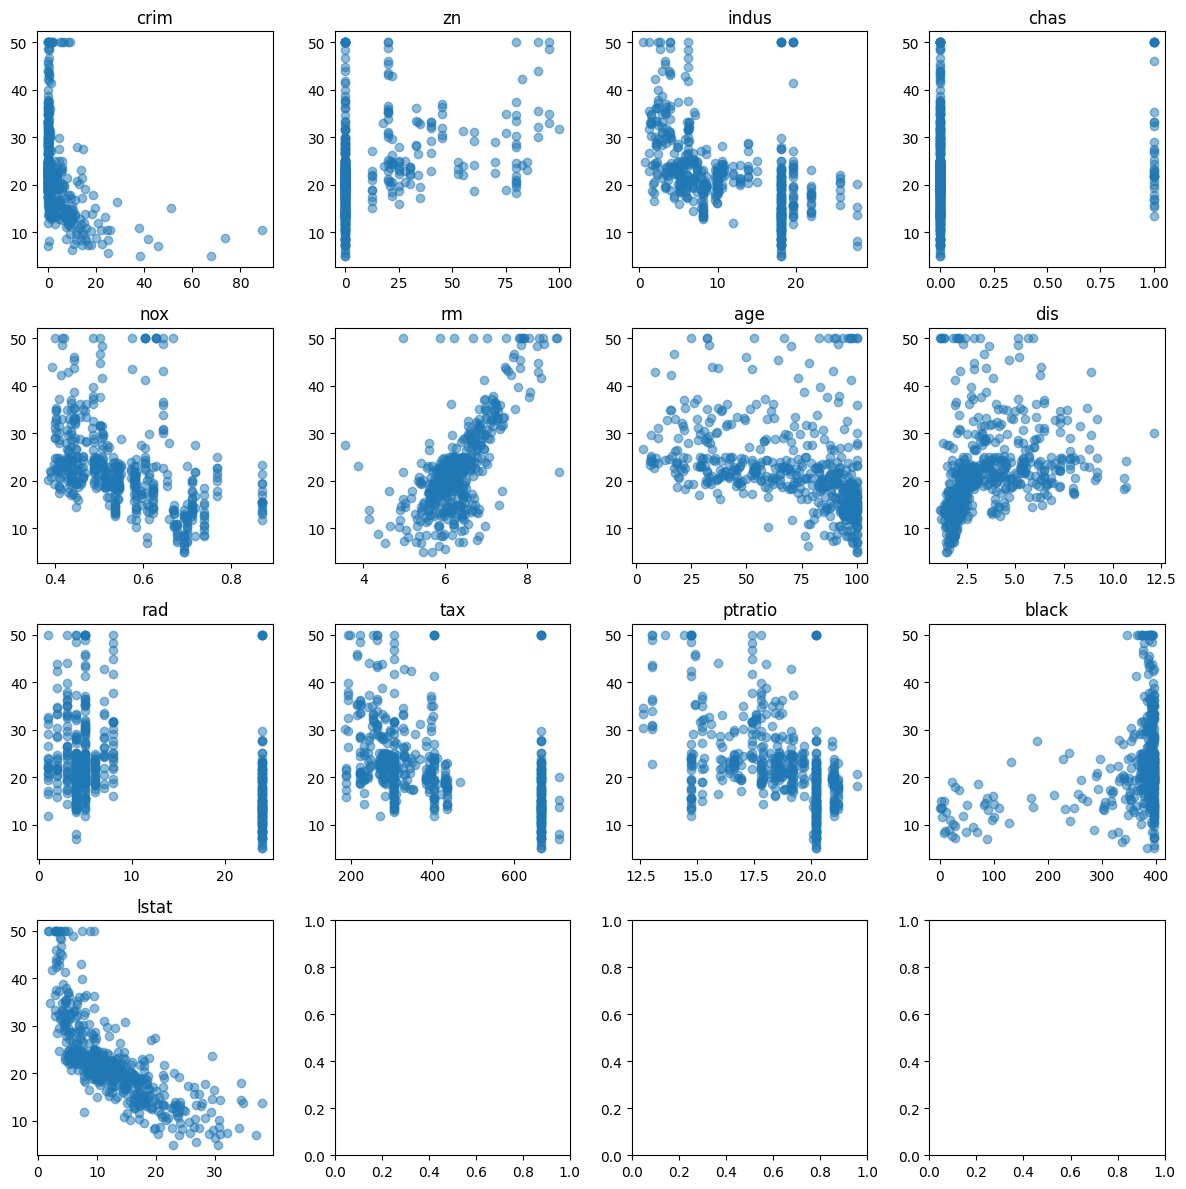

In [6]:
fig,axes = plt.subplots(nrows = 4, ncols=4, figsize = (12, 12))

axes = axes.flatten()

for i in range(0, 13):
  axes[i].plot(df_boston.iloc[:,i],df_boston['medv'],'o', alpha = .5)
  axes[i].set_title(df_boston.columns[i])

plt.tight_layout()

#sns.pairplot(df_boston)

## Preparing the data for machine learning

### Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df_boston.drop("medv", axis = 1)
y = df_boston['medv']

In [9]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
195,0.01381,80.0,0.46,0,0.422,7.875,32.0,5.6484,4,255,14.4,394.23,2.97
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
434,13.91340,0.0,18.10,0,0.713,6.208,95.0,2.2222,24,666,20.2,100.63,15.17
458,7.75223,0.0,18.10,0,0.713,6.301,83.7,2.7831,24,666,20.2,272.21,16.23
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.14052,0.0,10.59,0,0.489,6.375,32.3,3.9454,4,277,18.6,385.81,9.38
269,0.09065,20.0,6.96,1,0.464,5.920,61.5,3.9175,3,223,18.6,391.34,13.65
278,0.07978,40.0,6.41,0,0.447,6.482,32.1,4.1403,4,254,17.6,396.90,7.19
17,0.78420,0.0,8.14,0,0.538,5.990,81.7,4.2579,4,307,21.0,386.75,14.67


### Standardizing the data

This is not strictly necessary for OLS, but I will do it anyway. 

Standardization is to rescale a variable so that it has mean zero and standard deviation of one.

The process works like this:

1. First create a standardization object
2. Calculate the mean and sd of each numerical variable from the train set
3. Convert the values of variables (in both train and test sets) using 2.

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(X_train)

StandardScaler()

In [15]:
X_train_scaled = scaler.transform(X_train)

In [16]:
X_train_scaled

array([[-0.42704101,  4.09805388, -1.2821606 , ..., -1.75847274,
         0.36848849, -1.47206228],
       [ 0.36426841, -0.48006999,  0.95531935, ...,  0.78573951,
         0.38490745, -1.46049687],
       [ 0.01647159, -0.48006999,  0.95531935, ...,  0.78573951,
         0.34736276, -0.35889127],
       ...,
       [-0.42578825, -0.48006999, -0.91795342, ...,  0.78573951,
         0.41511834, -0.36178262],
       [-0.41521993,  0.12231473, -0.52907882, ..., -1.52718072,
         0.43799542,  0.02999575],
       [-0.41982916,  2.41137667, -1.42581204, ..., -0.09317018,
         0.15208658, -1.09474068]])

In [18]:
X_test_scaled = scaler.transform(X_test)

## Model estimation and evaluation

In [19]:
from sklearn.linear_model import LinearRegression

### Train the model


In [20]:
model_lm = LinearRegression()

In [21]:
model_lm.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
pred_train = model_lm.predict(X_train_scaled)

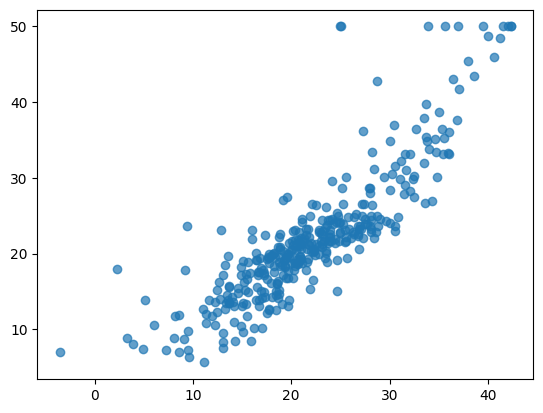

In [25]:
plt.plot(pred_train, y_train, 'o',alpha = 0.7)

## Model evaluations

Now we evaluate the model with metrics:

- MAE: mean absolute error
- MSE: mean squared error
- RMSE: root mean squared error

Our primary interest is in the test set metrics, but we also use the training set metrics to check for overfitting, etc.



In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
pred_train = model_lm.predict(X_train_scaled)
train_MAE = mean_absolute_error(y_train, pred_train)
train_MSE = mean_squared_error(y_train, pred_train)
train_RMSE = np.sqrt(mean_squared_error(y_train, pred_train))

In [28]:
pred_test = model_lm.predict(X_test_scaled)
test_MAE = mean_absolute_error(y_test, pred_test)
test_MSE = mean_squared_error(y_test, pred_test)
test_RMSE = np.sqrt(mean_squared_error(y_test, pred_test))

In [48]:
[train_MAE, train_MSE, train_RMSE]

[3.0731388725045425, 19.47590378071396, 4.413151230211124]

In [30]:
[test_MAE, test_MSE, test_RMSE]

[3.8356963614189366, 28.547585271468147, 5.342994036256091]

In [34]:
df_boston.medv.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

## Analyzing Errors



In [32]:
test_error = y_test - pred_test

<Axes: xlabel='medv', ylabel='Count'>

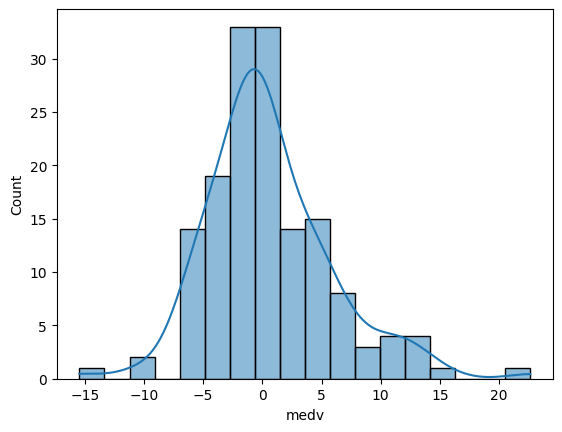

In [33]:
sns.histplot(test_error, kde = True)

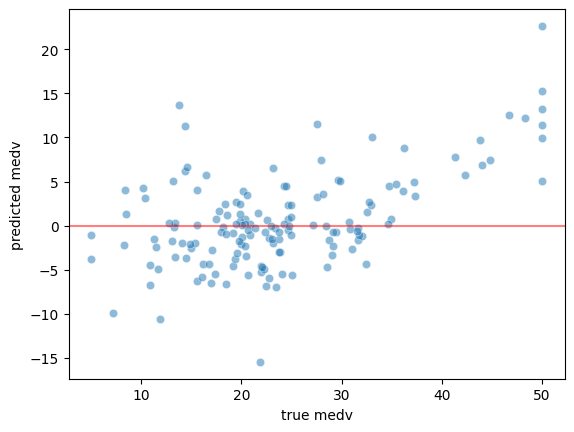

In [37]:
ax= sns.scatterplot(x = df_boston['medv'], y = test_error,alpha = .5)
ax.set(xlabel = 'true medv', ylabel = 'predicted medv')
plt.axhline(y = 0, color = 'r', alpha = .5)

# Polynomial Regression

In this section, we try polynomial regression, where we include square terms and interaction terms of input variables.




## Import module

In [38]:
from sklearn.preprocessing import PolynomialFeatures

## Generate the polynomial data

In [55]:
model_lm_poly = PolynomialFeatures(degree = 2)

In [59]:
model_lm_poly.fit(X_train)

PolynomialFeatures()

In [60]:
X_train_poly = model_lm_poly.transform(X_train)
X_train_poly

array([[1.00000000e+00, 2.00900000e-02, 9.50000000e+01, ...,
        1.52529303e+05, 1.12478400e+03, 8.29440000e+00],
       [1.00000000e+00, 6.53876000e+00, 0.00000000e+00, ...,
        1.53703203e+05, 1.16046800e+03, 8.76160000e+00],
       [1.00000000e+00, 3.67367000e+00, 0.00000000e+00, ...,
        1.51025504e+05, 4.11159960e+03, 1.11936400e+02],
       ...,
       [1.00000000e+00, 3.04100000e-02, 0.00000000e+00, ...,
        1.55874936e+05, 4.16919360e+03, 1.11513600e+02],
       [1.00000000e+00, 1.17470000e-01, 1.25000000e+01, ...,
        1.57529610e+05, 5.26686300e+03, 1.76092900e+02],
       [1.00000000e+00, 7.95000000e-02, 6.00000000e+01, ...,
        1.37477808e+05, 2.03558220e+03, 3.01401000e+01]])

In [61]:
X_train_poly.shape

(354, 105)

In [62]:
X_test_poly = poly.transform(X_test)
X_test_poly

array([[1.00000000e+00, 1.38100000e-02, 8.00000000e+01, ...,
        1.55417293e+05, 1.17086310e+03, 8.82090000e+00],
       [1.00000000e+00, 6.90500000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 2.11547700e+03, 2.84089000e+01],
       [1.00000000e+00, 1.39134000e+01, 0.00000000e+00, ...,
        1.01263969e+04, 1.52655710e+03, 2.30128900e+02],
       ...,
       [1.00000000e+00, 7.97800000e-02, 4.00000000e+01, ...,
        1.57529610e+05, 2.85371100e+03, 5.16961000e+01],
       [1.00000000e+00, 7.84200000e-01, 0.00000000e+00, ...,
        1.49575562e+05, 5.67362250e+03, 2.15208900e+02],
       [1.00000000e+00, 5.29305000e+00, 0.00000000e+00, ...,
        1.43171424e+05, 7.09840880e+03, 3.51937600e+02]])

### Standardization

In [63]:
scaler = StandardScaler()
scaler.fit(X_train_poly)

StandardScaler()

In [68]:
X_train_poly_scaled = scaler.transform(X_train_poly)

In [69]:
X_test_poly_scaled = scaler.transform(X_test_poly)

## Fit the model

## Model evaluations

Caclulate the metrics. Is it any better than the regression without polynomials?

In [70]:
pred_train_poly = model_lm_poly.predict(X_train_poly_scaled)
train_MAE = mean_absolute_error(y_train, pred_train_poly)
train_MSE = mean_squared_error(y_train, pred_train_poly)
train_RMSE = np.sqrt(mean_squared_error(y_train, pred_train_poly))


AttributeError: 'PolynomialFeatures' object has no attribute 'predict'

In [71]:
pred_test_poly = model_lm.predict(X_test_poly_scaled)
test_MAE = mean_absolute_error(y_test, pred_test_poly)
test_MSE = mean_squared_error(y_test, pred_test_poly)
test_RMSE = np.sqrt(mean_squared_error(y_test, pred_test_poly))

ValueError: X has 105 features, but LinearRegression is expecting 13 features as input.

## Analyzing errors

Now, check the error distributions, and see how much improve it made

## Try higher order polynomial

Let's try polynomials with 3 or more degrees. What do we find?

# Regularized regressions

In [ ]:
from sklearn.linear_model import RidgeCV

### Model fitting and evaluation

In [ ]:
model_ridge = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [ ]:
model_ridge.fit(X_train_poly_scaled,y_train)

In [ ]:
model_ridge.alpha_

In [ ]:
pred_test_ridge = model_ridge.predict(X_test_poly_scaled)

In [ ]:
MAE = mean_absolute_error(y_test, pred_test_ridge)
MSE = mean_squared_error(y_test, pred_test_ridge)
RMSE = np.sqrt(mean_squared_error(y_test, pred_test_ridge))

In [ ]:
[MAE, MSE, RMSE]

In [ ]:
model_ridge.coef_

## LASSO 

In [ ]:
from sklearn.linear_model import LassoCV

### Model fitting and evaluation

In [ ]:
model_lasso = LassoCV(eps = 0.1, cv = 10)

In [ ]:
model_lasso.fit(X_train_poly_scaled, y_train)

In [ ]:
model_lasso.alpha_

In [ ]:
model_lasso.coef_

In [ ]:
pred_test_lasso = model_lasso.predict(X_test_poly_scaled)
MAE = mean_absolute_error(y_test, pred_test_lasso)
MSE = mean_squared_error(y_test, pred_test_lasso)
RMSE = np.sqrt(mean_squared_error(y_test, pred_test_lasso))

In [ ]:
[MAE, MSE, RMSE]